In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from IPython import display

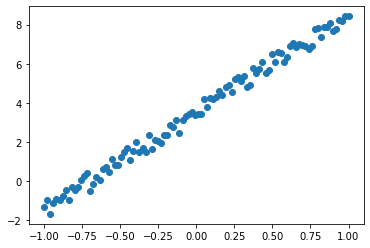

(<matplotlib.collections.PathCollection at 0x7fdf7e5545b0>, None)

In [2]:
x = torch.linspace(-1, 1, 100)
x = torch.unsqueeze(x, dim=1)   # [100] -> [100, 1]否则train的时候会报错维度不一致

y = 5 * x + 3 +  torch.rand(x.size())
# y = x.pow(2) + 0.2 * torch.rand(x.size())

x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy()), plt.show()

拟合一元函数其实两个参数就够用了，现在第一层有10个节点，输出层还有10个节点，w和b其实一共有40个参数了

forward中其实也不需要relu进行激活，因为本来就是线性函数

之所以要初始化网络参数，是因为如果初始就正好是正中间一个水平的直线，其实loss直接为0，根本不会训起来的

In [3]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 10)
        self.predict = torch.nn.Linear(10, 1)

        # 初始化网络参数
        torch.nn.init.uniform_(self.hidden.weight, a=-0.1, b=0.1)
        torch.nn.init.normal_(self.predict.weight, mean=0, std=1)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

net = Net()
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


SGD直接不下降，Adam可以很好的克服这些问题

In [4]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

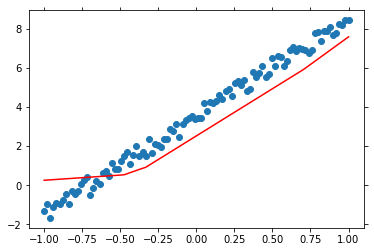

In [5]:
plt.ion()
for _ in range(100):
    prediction = net(x)
    loss = loss_func(prediction, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if _%5 == 0:
        plt.cla()
        display.clear_output(wait=True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-')
        plt.pause(0.5)
plt.ioff()
plt.show()